In [1]:
import os
import mujoco
import numpy
import mediapy as media
import matplotlib.pyplot as plt
import math

In [2]:
xml='''
<mujoco>
    <visual><global offwidth="800" offheight="600"/></visual>
    <option gravity="0 0 -9.81"><flag gravity="enable"/></option>
    <option timestep="1e-3"></option>
    <option><flag contact="enable"/></option>    
    <worldbody>
        <light name="top" pos="0 0 1" />
        <body name="floor" pos="0 0 0">
            <geom pos="0 0 -.05" size="5 5 .05" type="plane" rgba="1 0.83 0.61 0.5"/>
        </body>        
        <body name="A" pos="0 0 .5">
            <joint name="j1" type="hinge" axis="0 1 0" pos="0 0 0"
            stiffness="10" damping="1"  limited="true" range="-45 45"/>
            <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1"/>
            <body name="B" pos="1 0 0">
                <joint name="j2" type="hinge" axis="0 1 0" pos="0 0 0" 
                stiffness="10" damping="1" limited="true" range="-45 45"/>
                <geom type="box" size=".5 .05 .05" pos=".5 0 0" rgba="1 0 0 1"/>
            </body>
        </body>
    </worldbody>
<actuator>    
<motor name="motor1" joint="j1"/>
</actuator>    

</mujoco>
'''

In [3]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model,width=800,height=600)

In [4]:
def mycontroller(model,data):
    data.ctrl = [-30]
    return
mujoco.set_mjcb_control(mycontroller)

In [5]:
mujoco.mj_resetData(model,data)

In [6]:
data.qpos[0:2] = [-45*math.pi/180,45* math.pi/180]

In [7]:
frames = []
framerate = 30
duration = 10

In [8]:
x = []
q = []
w = []
t = []

In [9]:
while data.time < duration:
    mujoco.mj_step(model,data)
    if len(frames) < data.time*framerate:
        renderer.update_scene(data)
        pixels = renderer.render()
        frames.append(pixels)
    x.append(data.xpos.copy())
    q.append(data.qpos.copy())
    w.append(data.qvel.copy())
    t.append(data.time)
    

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

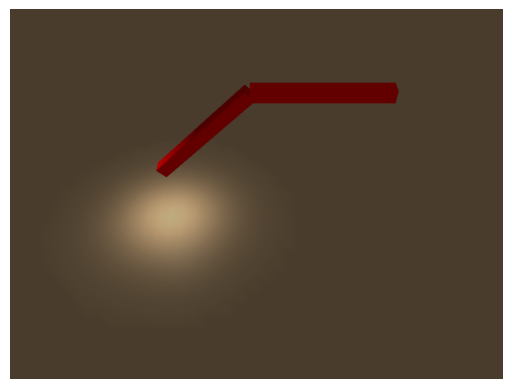

In [10]:
plt.imshow(frames[0])
plt.axis('off')
    

In [11]:
media.show_video(frames, fps=framerate,width=800,height=600)

In [12]:
media.write_video('pendulum.mp4',frames,fps=framerate)

In [13]:
data

In [14]:
data.xpos

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       ],
       [0.70041402, 0.        , 1.21373679]])

In [15]:
t = numpy.array(t)
x = numpy.array(x)
q = numpy.array(q)
w = numpy.array(w)

In [16]:
w

array([[-2.96188563e-01,  6.21702484e-01],
       [-3.03372805e-01,  5.77052871e-01],
       [-2.99982247e-01,  5.26523920e-01],
       ...,
       [ 5.32625540e-15,  4.53423667e-14],
       [ 5.32625540e-15,  4.53423667e-14],
       [ 5.32625540e-15,  4.53423667e-14]], shape=(10001, 2))

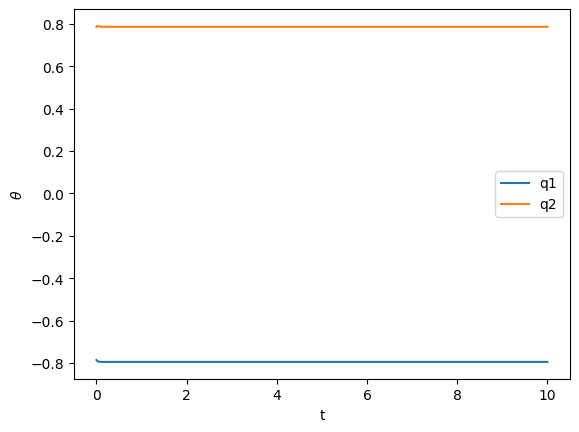

In [17]:
plt.plot(t,q)
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend(['q1','q2'])

In [18]:
import yaml
data = {}
data['t']=t.tolist()
data['q']=q.tolist()

with open('data.yml','w') as f:
    yaml.dump(data,f)

with open('data.yml') as f:
    data = yaml.load(f,Loader=yaml.Loader)

q = numpy.array(data['q'])
t = numpy.array(data['t'])

In [19]:
t.shape

(10001,)